In [308]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [309]:
#do a little bit of data cleaning
df = pd.read_csv("H:/Datasets/ML/CreditApproval/crx.csv")
df["A14"] = pd.to_numeric(df["A14"], errors='coerce')
df["A2"] = pd.to_numeric(df["A2"], errors='coerce')

In [310]:
df.shape

(690, 16)

In [311]:
#first we remove missing values
categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A11',
       'A12', 'A13']
for col in categorical:
    df.loc[df[col] == '?', col] = np.NaN
df = df.dropna()

In [312]:
#then one-hot encode the categorical data
for col in categorical:
    tmp = pd.get_dummies(df[col], prefix = col)
    df = df.drop(col, axis = 1)
    df = df.merge(tmp, left_index = True, right_index = True)

In [313]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [314]:
#split the data into test and train
from sklearn.model_selection import train_test_split
y = df.A16
df = df.drop('A16', axis = 1)

In [315]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 1/3, random_state = 42)

In [316]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [317]:
pred = clf.predict(X_test)

In [318]:
#Find the best parameters for C and gamma
from sklearn.model_selection import GridSearchCV

In [331]:
param_grid = {'svc__C': [5,8, 10, 12 ,15, 20], 'svc__gamma': [0.00008, 0.0001, 0.0003,]}
grid = GridSearchCV(clf, param_grid)
%time grid.fit(X_train, y_train)
print(grid.best_params_)

Wall time: 1 s
{'svc__C': 12, 'svc__gamma': 0.0001}


In [332]:
model = grid.best_estimator_

In [333]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [334]:
yfit = model.predict(X_test)
print(classification_report(y_test,yfit))

              precision    recall  f1-score   support

           +       0.77      0.93      0.84        95
           -       0.93      0.79      0.85       123

    accuracy                           0.85       218
   macro avg       0.85      0.86      0.85       218
weighted avg       0.86      0.85      0.85       218



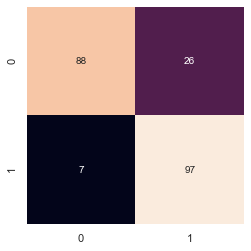

In [335]:
mat = confusion_matrix(y_test,yfit)
sns.heatmap(mat.T, square = True, annot = True, fmt='d',cbar=False)

In [336]:
model.score(X_test,y_test)

0.8486238532110092